# **Forecasting Commercial Banks Transactions**

<ol><i>Authors</i>:
    <li>Nobert Akwir</li>
    <li>Karen Amanya</li>
    <li>Eugene Kuloba</li>
    <li>David Mwiti</li>
    <li>Anthony Nene</li>
</ol>

## **1. Business Understanding**

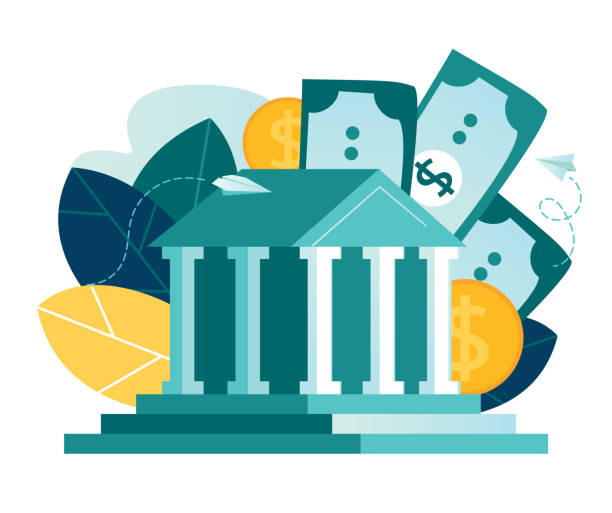

The Banking sector in Kenya has been seeing immense growth over the past few years, this being in direct relation to the penetration rate/ improved access to banking services by major banks we have in Kenya. From the Central Bank’s Financial access report(2021), 29.6% of the total population of Kenyans having formal access to bank services still used physical bank branches.

As this penetration rate has increased, the level of customer interaction and transactions at the branch level has also increased, hence leading to branches requesting more cash from their central vaults, and also repatriating more cash back to the central vault. This sometimes is not the norm, as the branches have to breach their vault limit due to more transactions by the customers even after repatriation is done(which are always in the morning hours), or even having requested less cash hence them not having enough cash to serve the customers.

The branches holding this excess cash leads the bank to incur more expenses as they have to take a cover for the excess cash, and also this is large risk exposure to the bank if the branches get hit. For the less cash perspective, this brings dissatisfaction to their customers and brings down the rating of the bank.

NCBA Bank is a commercial banking company that aims to conduct research to get findings that aid in confirming how much their branches should hold at specific periods in order for them to have sufficient funds to carry out its business with its customers and also not breach its vaults limits by too much.This project aims to develop a time series analysis model that will describe and forecast future transaction thresholds, to assist the bank’s branches identify the amount of cash they need at specific periods of time in order to prevent being over limit and also have satisfactory cash to serve their customers.


### **Objectives**

> #### **General Objective**
The general objective is to develop a model that will successfully forecast cash transactions that will help NCBA Bank maintain a sufficient cash at its specifc branches.
> #### **Specific Objectives**
<ul type='square'>
    <li >  </li>
    <li> </li>
    <li></li>
</ul>


### **Success Criteria**

## **2. Data Understanding**

The data used in this project is sources from data world. The data consists of demo bank transaction details(debits and credits) carried out by different customers and includes other details such as the amount, the mode of transaction(either cash, RTGS, EFT, SWIFT e.t.c), the account's balance at the time of the transation, the time of the transaction e.t.c

#### **Importing the required libraries**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller


In [19]:
#loading the data
raw_df = pd.read_csv('completedtrans.csv')

In [20]:
#shape of the df
raw_df.shape

(1056320, 16)

In [21]:
#A preview of the df
raw_df.head()

,Unnamed: 0,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulldate,fulltime,fulldatewithtime
0,1,T00695247,A00002378,Credit,Credit in Cash,700.0,700.0,NaN,NaN,NaN,2013,1,1,2013-01-01,11:02:40,2013-01-01T11:02:40
1,2,T00171812,A00000576,Credit,Credit in Cash,900.0,900.0,NaN,NaN,NaN,2013,1,1,2013-01-01,08:23:33,2013-01-01T08:23:33
2,3,T00207264,A00000704,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,NaN,2013,1,1,2013-01-01,15:19:21,2013-01-01T15:19:21
3,4,T01117247,A00003818,Credit,Credit in Cash,600.0,600.0,NaN,NaN,NaN,2013,1,1,2013-01-01,10:42:35,2013-01-01T10:42:35
4,5,T00579373,A00001972,Credit,Credit in Cash,400.0,400.0,NaN,NaN,NaN,2013,1,2,2013-01-02,11:39:25,2013-01-02T11:39:25


In [22]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1056320 non-null  int64  
 1   trans_id          1056320 non-null  object 
 2   account_id        1056320 non-null  object 
 3   type              1056320 non-null  object 
 4   operation         873206 non-null   object 
 5   amount            1056320 non-null  float64
 6   balance           1056320 non-null  float64
 7   k_symbol          574439 non-null   object 
 8   bank              273508 non-null   object 
 9   account           295389 non-null   float64
 10  year              1056320 non-null  int64  
 11  month             1056320 non-null  int64  
 12  day               1056320 non-null  int64  
 13  fulldate          1056320 non-null  object 
 14  fulltime          1056320 non-null  object 
 15  fulldatewithtime  1056320 non-null  object 
dtype

From our objectives, the features we will need are the amount, operatio(which describe the nature of the transaction) and fulldate and fulltime features.
One thing we have to note, is that we will be only looking into transaction operations that deal with physical cash.

In [23]:
debit_mask = raw_df['type'] == 'Debit'
raw_df.loc[debit_mask, 'amount'] *= -1


In [24]:
#setting the fulldate as the index
raw_df['fulldate'] = pd.to_datetime(raw_df['fulldate'])
raw_df = raw_df.set_index(['fulldate'])
raw_df.head()

,Unnamed: 0,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulltime,fulldatewithtime
fulldate,,,,,,,,,,,,,,,
2013-01-01,1,T00695247,A00002378,Credit,Credit in Cash,700.0,700.0,NaN,NaN,NaN,2013,1,1,11:02:40,2013-01-01T11:02:40
2013-01-01,2,T00171812,A00000576,Credit,Credit in Cash,900.0,900.0,NaN,NaN,NaN,2013,1,1,08:23:33,2013-01-01T08:23:33
2013-01-01,3,T00207264,A00000704,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,NaN,2013,1,1,15:19:21,2013-01-01T15:19:21
2013-01-01,4,T01117247,A00003818,Credit,Credit in Cash,600.0,600.0,NaN,NaN,NaN,2013,1,1,10:42:35,2013-01-01T10:42:35
2013-01-02,5,T00579373,A00001972,Credit,Credit in Cash,400.0,400.0,NaN,NaN,NaN,2013,1,2,11:39:25,2013-01-02T11:39:25


In [25]:
relevant_cols = ['type', 'operation', 'amount']

#removing irrelevant columns
raw_df = raw_df[relevant_cols]

#removing operations not related to hard cash
raw_df = raw_df.loc[(raw_df['operation'] == 'Credit in Cash') | (raw_df['operation'] == 'Cash Withdrawal')]

#preview of the new df
print(raw_df.shape)
raw_df.head()

(591661, 3)


,type,operation,amount
fulldate,,,
2013-01-01,Credit,Credit in Cash,700.0
2013-01-01,Credit,Credit in Cash,900.0
2013-01-01,Credit,Credit in Cash,1000.0
2013-01-01,Credit,Credit in Cash,600.0
2013-01-02,Credit,Credit in Cash,400.0


In [26]:
#creating seperate columns for withdawals and credits
raw_df['credit_in_cash'] = raw_df['amount'].map(lambda x: x if x > 0 else 0)
raw_df['cash_withdrawal'] = raw_df['amount'].map(lambda x: x if x < 0 else 0)
raw_df.drop(columns = ['type','operation'], inplace = True)
raw_df.head()

,amount,credit_in_cash,cash_withdrawal
fulldate,,,
2013-01-01,700.0,700.0,0.0
2013-01-01,900.0,900.0,0.0
2013-01-01,1000.0,1000.0,0.0
2013-01-01,600.0,600.0,0.0
2013-01-02,400.0,400.0,0.0


In [27]:
#Downsampling the time series to days
raw_df = raw_df.resample('D').agg({'credit_in_cash':np.sum, 'cash_withdrawal':np.sum})
raw_df.head()

,credit_in_cash,cash_withdrawal
fulldate,,
2013-01-01,3200.0,0.0
2013-01-02,1500.0,0.0
2013-01-03,3700.0,0.0
2013-01-04,2600.0,0.0
2013-01-05,1100.0,0.0


In [28]:
# create a closing balance column by subtracting cash_withdrawal from credit_in_cash and taking the cumulative sum
raw_df['closing_balance'] = (raw_df['credit_in_cash'] + raw_df['cash_withdrawal']).cumsum()

# shift the closing balance column by one day to use it as the opening balance for the next day
raw_df['opening_balance'] = raw_df['closing_balance'].shift(1)

# fill the first opening balance value with 0 since there is no previous day's closing balance
raw_df.at[raw_df.index[0], 'opening_balance'] = 0.0


In [29]:
raw_df.head()

,credit_in_cash,cash_withdrawal,closing_balance,opening_balance
fulldate,,,,
2013-01-01,3200.0,0.0,3200.0,0.0
2013-01-02,1500.0,0.0,4700.0,3200.0
2013-01-03,3700.0,0.0,8400.0,4700.0
2013-01-04,2600.0,0.0,11000.0,8400.0
2013-01-05,1100.0,0.0,12100.0,11000.0


In [30]:
#raw_df.drop(columns = ['opening_balance'], axis = 1, inplace = True)
raw_df.head()

,credit_in_cash,cash_withdrawal,closing_balance,opening_balance
fulldate,,,,
2013-01-01,3200.0,0.0,3200.0,0.0
2013-01-02,1500.0,0.0,4700.0,3200.0
2013-01-03,3700.0,0.0,8400.0,4700.0
2013-01-04,2600.0,0.0,11000.0,8400.0
2013-01-05,1100.0,0.0,12100.0,11000.0


In [31]:
raw_df.tail()

,credit_in_cash,cash_withdrawal,closing_balance,opening_balance
fulldate,,,,
2018-12-27,972763.0,-1036595.0,79155498.2,79219330.2
2018-12-28,820312.0,-773618.0,79202192.2,79155498.2
2018-12-29,822268.0,-807350.0,79217110.2,79202192.2
2018-12-30,799625.0,-1005987.0,79010748.2,79217110.2
2018-12-31,0.0,-1915.7,79008832.5,79010748.2


### 3. EDA

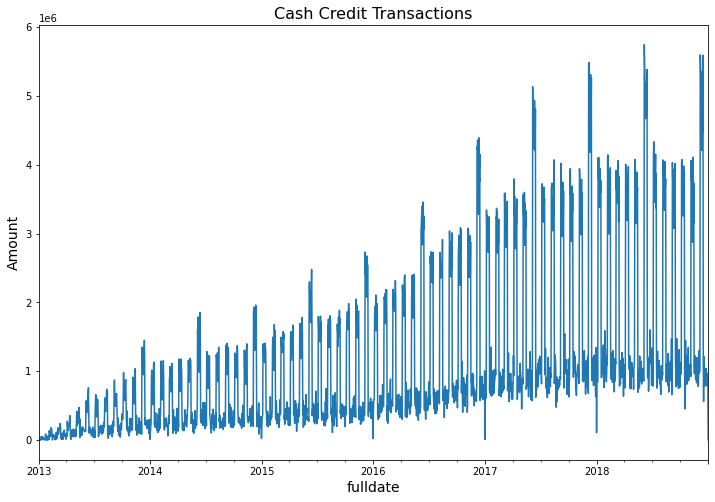

In [32]:
#Visualize transactions
plt.title('Cash Credit Transactions', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Amount', fontsize = 14)
raw_df['credit_in_cash'].plot(figsize = (12,8))
plt.show();

Observations

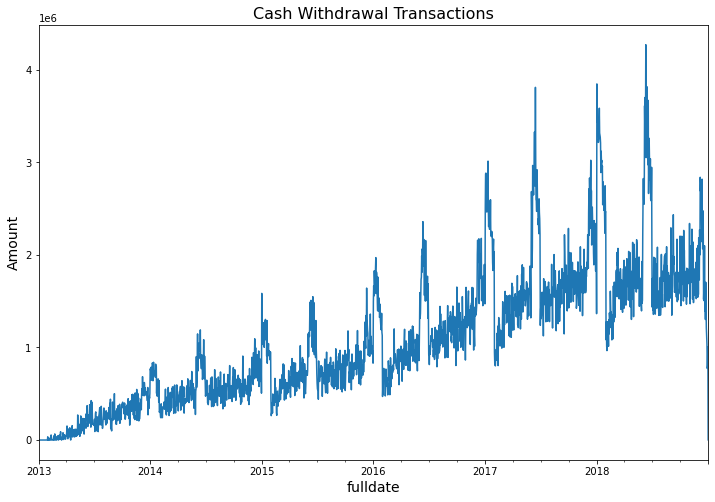

In [33]:
#Visualize transactions
plt.title('Cash Withdrawal Transactions', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Amount', fontsize = 14)
np.absolute(raw_df['cash_withdrawal']).plot(figsize = (12,8))
plt.show();

Observations

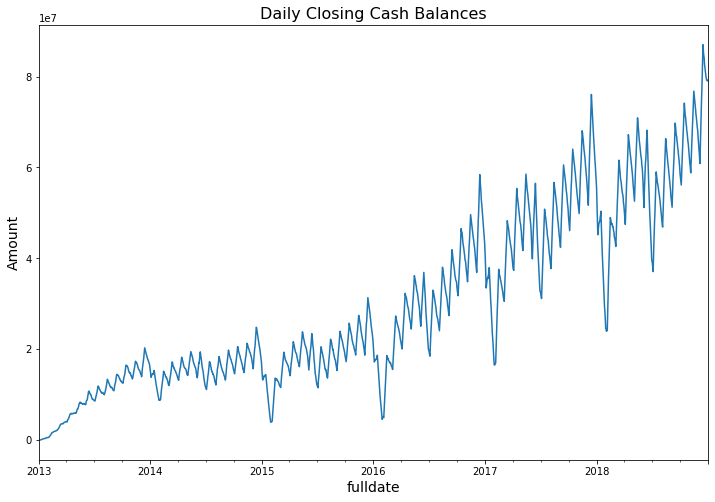

In [34]:
#Visualize closing balances
plt.title('Daily Closing Cash Balances', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Amount', fontsize = 14)
raw_df['closing_balance'].plot(figsize = (12,8))
plt.show();

Observations

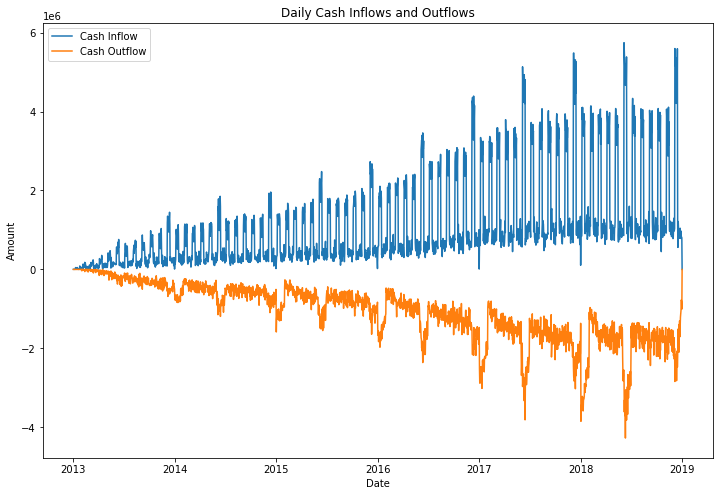

In [35]:
# Line plot of daily cash inflows and outflows
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(raw_df.index, raw_df['credit_in_cash'], label='Cash Inflow')
ax.plot(raw_df.index, raw_df['cash_withdrawal'], label='Cash Outflow')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
ax.set_title('Daily Cash Inflows and Outflows')
ax.legend()
plt.show()


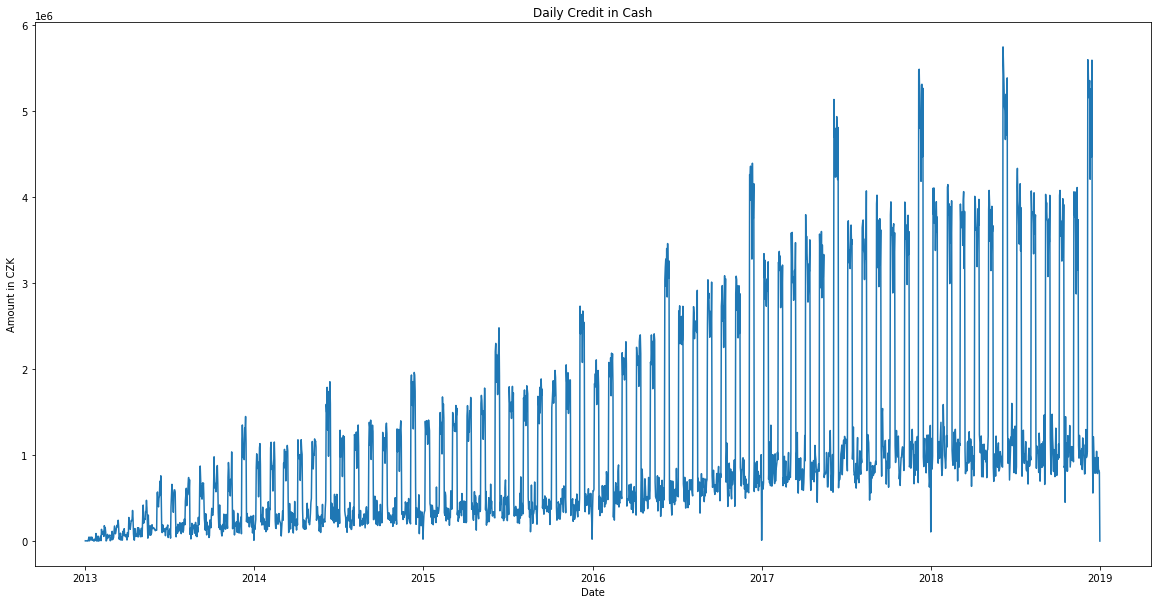

In [36]:
#plot of daily credit in cash
plt.figure(figsize=(20, 10))
plt.plot(raw_df.index, raw_df['credit_in_cash'])
plt.title('Daily Credit in Cash')
plt.xlabel('Date')
plt.ylabel('Amount in CZK')
plt.show()


* Bar plot of daily credit in cash and cash withdrawal amounts: This would show the daily amount of cash coming in and going out, which could reveal any unusual spikes or dips.

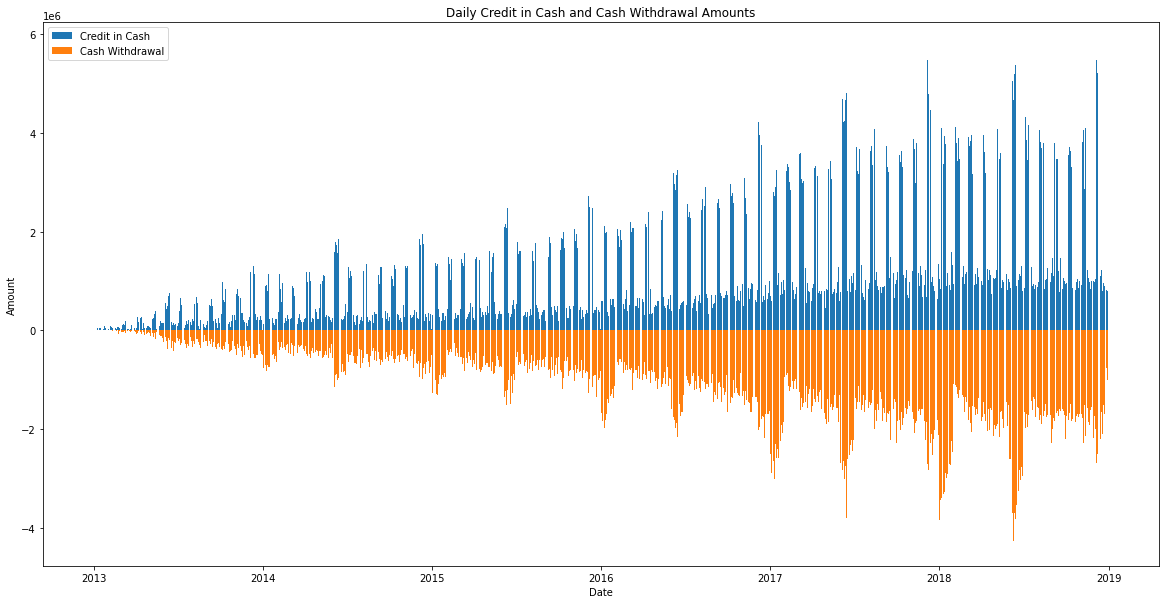

In [37]:
# Group the data by day and sum the amounts
daily_totals = raw_df.groupby(by=pd.Grouper(freq='D')).sum()

# Create the bar plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(daily_totals.index, daily_totals['credit_in_cash'], label='Credit in Cash')
ax.bar(daily_totals.index, daily_totals['cash_withdrawal'], label='Cash Withdrawal')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
ax.set_title('Daily Credit in Cash and Cash Withdrawal Amounts')
ax.legend()
plt.show()

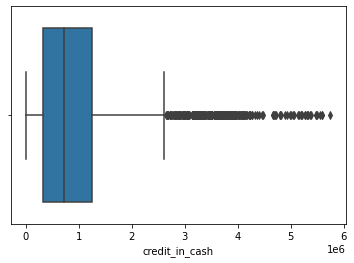

In [39]:
import seaborn as sns
sns.boxplot(x=raw_df['credit_in_cash'])
plt.show()

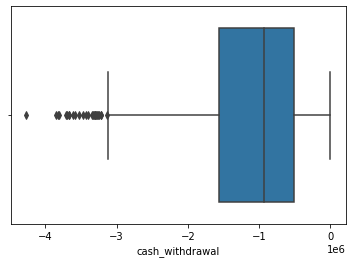

In [40]:
sns.boxplot(x=raw_df['cash_withdrawal'])
plt.show()

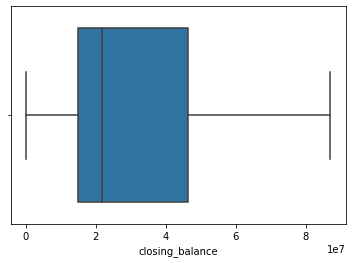

In [41]:
sns.boxplot(x=raw_df['closing_balance'])
plt.show()

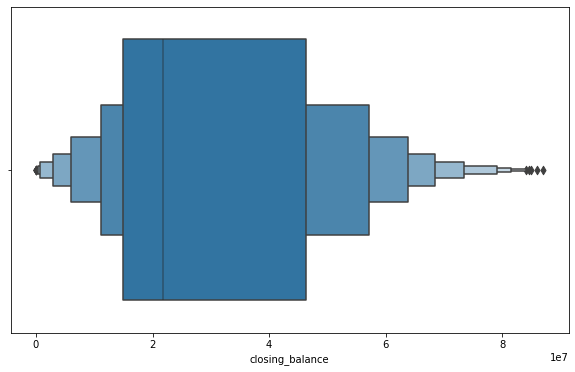

In [42]:
plt.figure(figsize=(10, 6))
sns.boxenplot(raw_df['closing_balance'])
plt.show()

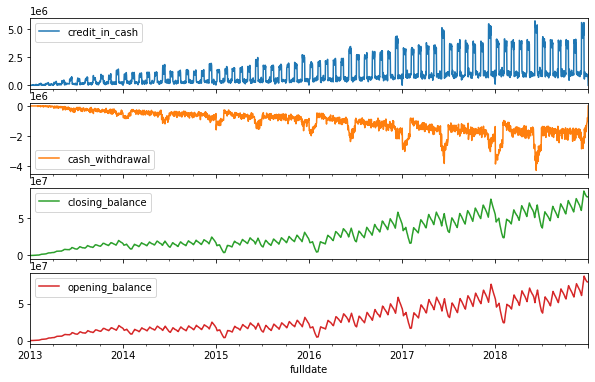

In [43]:
raw_df.plot(figsize=(10, 6), subplots=True);

In [46]:
import hvplot.pandas
raw_df.hvplot(
    title='Time Series plot using hvplot',
    width=950,
    height=600
)


:NdOverlay   [Variable]
   :Curve   [fulldate]   (value)

In [47]:
raw_df.isnull().sum()

credit_in_cash     0
cash_withdrawal    0
closing_balance    0
opening_balance    0
dtype: int64

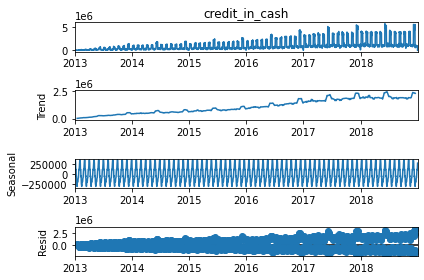

In [48]:
import statsmodels.api as sm

# decompose credit_in_cash
decomp_credit_in_cash = sm.tsa.seasonal_decompose(raw_df['credit_in_cash'], model='additive', period=30)
decomp_credit_in_cash.plot()
plt.show()

Let's break down the resulting plot into four parts:
1. This is the original observed data that we are decomposing.
2. The trend component shows an upward direction. The trend indicates whether
there is positive (increasing or upward), negative (decreasing or downward),
or constant (no trend or horizontal) long-term movement.
3. The seasonal component shows the seasonality effect and the repeating pattern of
highs and lows.
4. Finally, the residual (noise) component shows the random variation in the data
after applying the model. In this case, a multiplicative model was used.

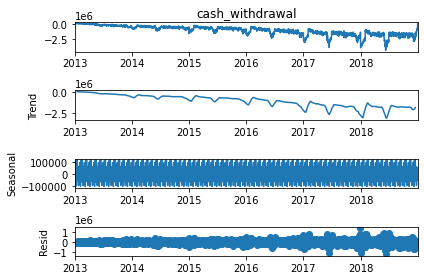

In [49]:
decomp_cash_withdrawal = sm.tsa.seasonal_decompose(raw_df['cash_withdrawal'], model='additive', period=30)
decomp_cash_withdrawal.plot()
plt.show()

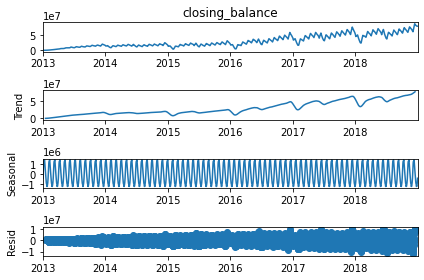

In [50]:
decomp_closing_balance = sm.tsa.seasonal_decompose(raw_df['closing_balance'], model='additive', period=30)
decomp_closing_balance.plot()
plt.show()

In [51]:
#converting withdrawals to absolute values
raw_df['cash_withdrawal'] = np.absolute(raw_df['cash_withdrawal'])

In [52]:
### Checking for stationarity
result = adfuller(raw_df['credit_in_cash'])
print('Cash Credit Transations:')
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

Cash Credit Transations:
ADF Statistic: -1.541502291453344
p-value: 0.5128900580290513
Critical Values:
	1%: -3.4333754500434264
	5%: -2.862876536558312
	10%: -2.56748150557262


Since the p-value of the ADF test is greater than the significance level of 0.05 and the ADF statistic is greater than the critical values at 1%, 5%, and 10% levels, we fail to reject the null hypothesis that the time series is non-stationary. This means that the time series data for 'credit_in_cash' is non-stationary and we need to apply some transformations to make it stationary before we can model it.

In [53]:
### Checking for stationarity
result = adfuller(raw_df['cash_withdrawal'])
print('Cash Withdrawal Transations:')
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

Cash Withdrawal Transations:
ADF Statistic: -3.56155086888802
p-value: 0.0065400957469309105
Critical Values:
	1%: -3.4333629045681398
	5%: -2.8628709972102797
	10%: -2.567478556227762


The ADF statistic for cash withdrawal transactions is -3.56 and the p-value is 0.007. The p-value is less than the significance level of 0.05, which suggests that we can reject the null hypothesis that the data is non-stationary. Therefore, we can conclude that the cash withdrawal transactions data is stationary.

In [54]:
### Checking for stationarity
result = adfuller(raw_df['closing_balance'])
print('Closing Balances:')
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

Closing Balances:
ADF Statistic: -1.175723374613597
p-value: 0.6839507656782637
Critical Values:
	1%: -3.4333754500434264
	5%: -2.862876536558312
	10%: -2.56748150557262


Based on the results of the ADF test for all three time series (credit_in_cash, cash_withdrawal, and closing_balance), none of them are stationary as their p-values are all above 0.05. This suggests that there is still some trend or seasonality in the data. We can try to remove the trend and seasonality by applying differencing or other transformation techniques.

In [55]:
# first difference of credit_in_cash
diff1_credit_in_cash = raw_df['credit_in_cash'].diff().dropna()

# first difference of closing_balance
diff1_closing_balance = raw_df['closing_balance'].diff().dropna()


In [56]:
# Check for stationarity
result = adfuller(diff1_credit_in_cash)
print('Credit in Cash (1st order differencing):')
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")
    
print('\n')

Credit in Cash (1st order differencing):
ADF Statistic: -25.225616552056444
p-value: 0.0
Critical Values:
	1%: -3.4333768504372877
	5%: -2.862877154888883
	10%: -2.5674818347939294




With the first order differencing applied, the ADF test statistic is much lower than the critical values, and the p-value is 0.0, which indicates that we can reject the null hypothesis of non-stationarity. This suggests that the first order differencing has successfully made the time series stationary.

In [57]:

# Check for stationarity
result = adfuller(diff1_closing_balance)
print('Closing Balance (1st order differencing):')
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

Closing Balance (1st order differencing):
ADF Statistic: -5.876521921770171
p-value: 3.150093739723527e-07
Critical Values:
	1%: -3.4333754500434264
	5%: -2.862876536558312
	10%: -2.56748150557262


Based on the ADF test results, it appears that both the 'credit_in_cash' and 'closing_balance' columns have become stationary after applying 1st order differencing. The p-values are less than 0.05 and the ADF statistic values are much lower than the critical values at all confidence levels. Therefore, we can proceed with further analysis on these transformed series.

In [58]:
# Calculate rolling mean and subtract from original data
rolling_mean = raw_df['closing_balance'].rolling(window=12).mean()
detrended = raw_df['closing_balance'] - rolling_mean

# Check stationarity of detrended series
result = adfuller(detrended.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -6.587406866436609
p-value: 7.2562876469899465e-09
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [59]:
p_value = 7.2562876469899465e-09
print("p-value: {:.10f}".format(p_value))


p-value: 0.0000000073


In [60]:
df = detrended.copy()

In [67]:
# Subtract rolling mean from closing_balance
detrended = raw_df['closing_balance'] - rolling_mean

# Create new DataFrame with detrended values and date as index
df_detrended = pd.DataFrame({'closing_balance': detrended})
df_detrended.index = raw_df.index

df_detrended


,closing_balance
fulldate,
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-05,NaN
...,...
2018-12-27,-2.453170e+06
2018-12-28,-1.927112e+06
2018-12-29,-1.470459e+06


## Modeling

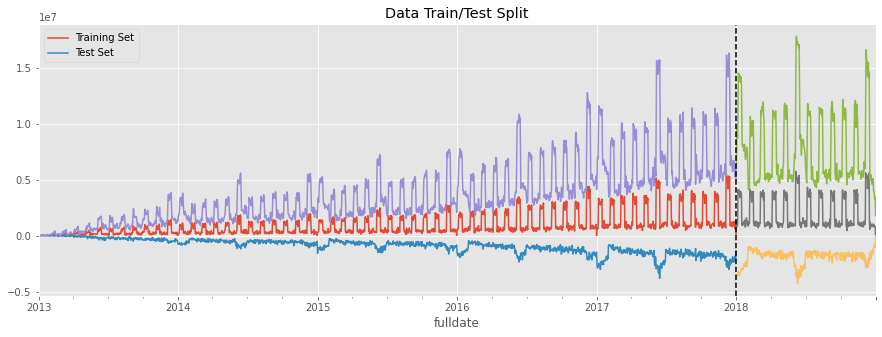

In [106]:
# split the data
train = raw_df.loc['2013-01-01':'2017-12-31']
test = raw_df.loc['2018-01-01':'2018-12-31']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2017-12-31', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

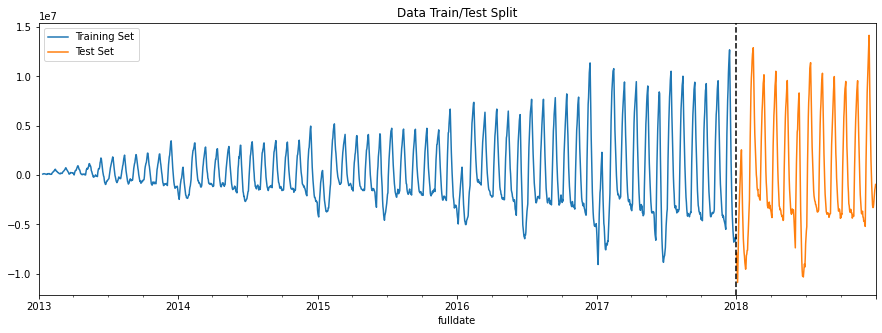

In [68]:
# split the data
train = df_detrended.loc['2013-01-01':'2017-12-31']
test = df_detrended.loc['2018-01-01':'2018-12-31']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2017-12-31', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [71]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
   
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df_detrended)

In [61]:
df.head()

fulldate
2013-01-01   NaN
2013-01-02   NaN
2013-01-03   NaN
2013-01-04   NaN
2013-01-05   NaN
Freq: D, Name: closing_balance, dtype: float64

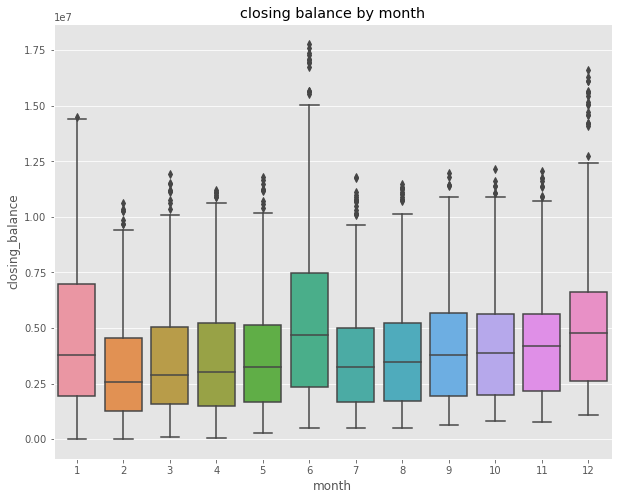

In [118]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='closing_balance')
ax.set_title('closing balance by month')
plt.show()

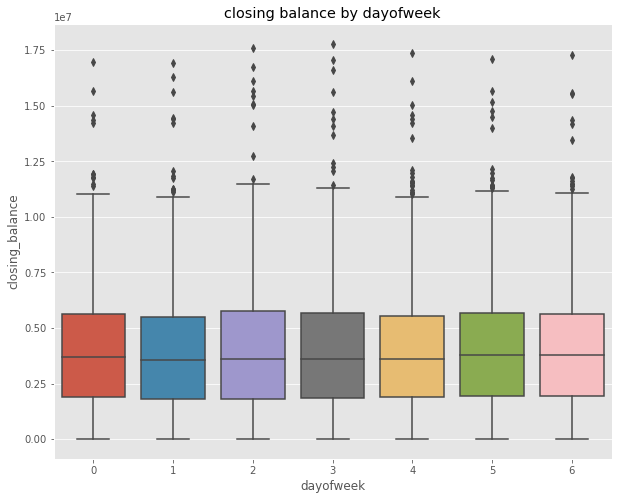

In [88]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofweek', y='closing_balance')
ax.set_title('closing balance by dayofweek')
plt.show()

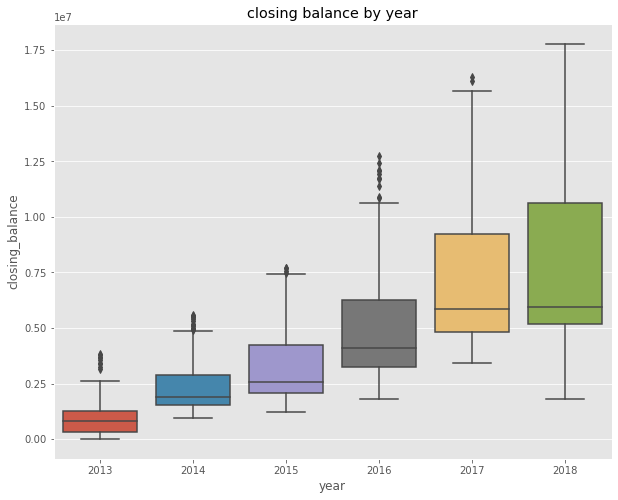

In [89]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='year', y='closing_balance')
ax.set_title('closing balance by year')
plt.show()

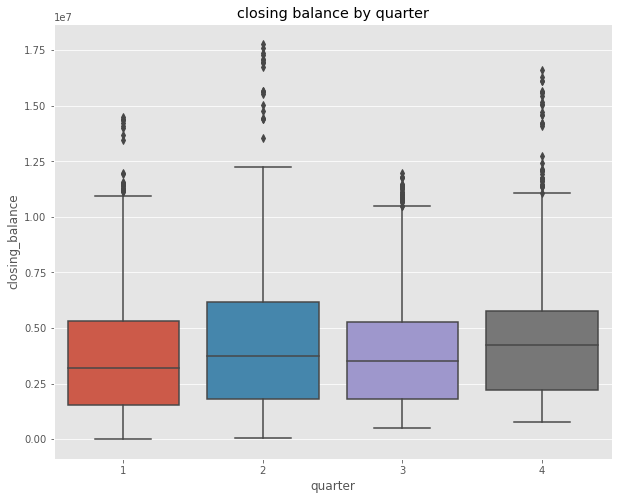

In [91]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='quarter', y='closing_balance')
ax.set_title('closing balance by quarter')
plt.show()

In [74]:
train = df.loc['2013-01-01':'2017-12-31']
test = df.loc['2018-01-01':'2018-12-31']
FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'closing_balance'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [75]:
import statsmodels.api as sm

# Create and fit ARIMA model
model = sm.tsa.ARIMA(endog=y_train, order=(1, 1, 1))
results = model.fit()

# Make predictions
preds = results.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)


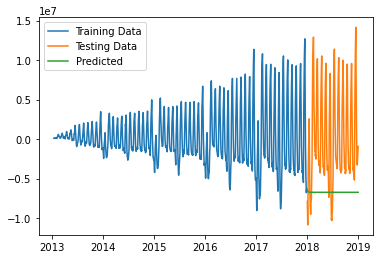

In [76]:
import matplotlib.pyplot as plt

# Create a new DataFrame to hold actual values and predictions
pred_df = pd.DataFrame({'actual': y_test, 'predicted': preds})

# Plot the actual values and predicted values on the same graph
plt.plot(X_train.index, y_train, label='Training Data')
plt.plot(X_test.index, y_test, label='Testing Data')
plt.plot(pred_df.index, pred_df['predicted'], label='Predicted')
plt.legend()
plt.show()


In [ ]:
b

In [77]:
import statsmodels.api as sm

# Create and fit SARIMA model
model = sm.tsa.statespace.SARIMAX(endog=y_train, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
results = model.fit()

# Make predictions
preds = results.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)


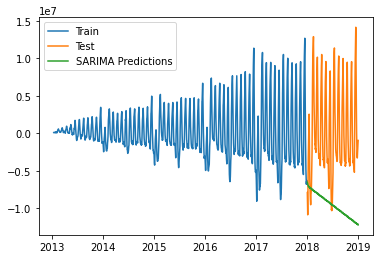

In [78]:
# Plot actual data and predicted values
plt.plot(train.index, train[TARGET], label='Train')
plt.plot(test.index, test[TARGET], label='Test')
plt.plot(test.index, preds, label='SARIMA Predictions')
plt.legend()
plt.show()


In [79]:
import statsmodels.api as sm

# Create and fit ARIMA model
model = sm.tsa.ARIMA(endog=y_train, order=(1, 1, 1))
results = model.fit()

# Make predictions
preds = results.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)


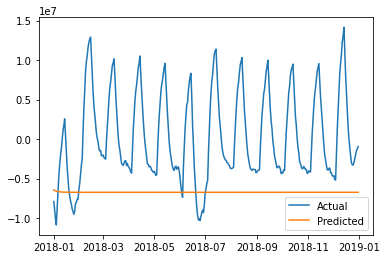

In [80]:
#Plot actual data
plt.plot(test.index, y_test, label='Actual')

# Plot predicted data
plt.plot(test.index, preds, label='Predicted')

plt.legend()
plt.show()


In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate predictions for the test set
arima_preds = results.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)

# Compute MSE, RMSE, MAE and R-squared
mse = mean_squared_error(y_test, arima_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, arima_preds)
r2 = r2_score(y_test, arima_preds)

print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}')


MSE: 28832507928491.88, RMSE: 5369591.04, MAE: 4243956.47, R-squared: -1.64


In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions with the SARIMA model
sarima_preds = results.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)

# Calculate metrics for SARIMA model
sarima_mse = mean_squared_error(y_test, sarima_preds)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mae = mean_absolute_error(y_test, sarima_preds)
sarima_r2 = r2_score(y_test, sarima_preds)

print("SARIMA Model Metrics:")
print(f"MSE: {sarima_mse:.2f}, RMSE: {sarima_rmse:.2f}, MAE: {sarima_mae:.2f}, R-squared: {sarima_r2:.2f}")


SARIMA Model Metrics:
MSE: 28832507928491.88, RMSE: 5369591.04, MAE: 4243956.47, R-squared: -1.64
